In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns                               
import matplotlib.pyplot as plt
import sklearn
import scipy
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("wine.csv")         #importing the dataset
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol Alcohol_content  quality  
0         9.4             Low        5  
1         9.8          Medium        5  
2         9.8          Medium        5  
3         9.8          Medium        6  
4         9.4             Low        5  
...       ...             ...      ...  
1594     10.5          Medium        5  
1595     11.2            High        6  
1596     11.0            High        6  
1597     10.2          Medium        5  
1598     11.0            High        6  

[1599 rows x 13 columns]

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol Alcohol_content  quality  
0      9.4             Low        5  
1      9.8          Medium        5  
2      9.8          Medium        5  
3      9.8          Medium        6  
4      9.4             Low        5

In [4]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol Alcohol_content  quality  
1594     10.5          Medium        5  
1595     11.2            High        6  
1596     11.0            High        6  
1597     10.2          Medium        5  
1598     11.0            High        6

In [5]:
#Checking the shape of dataset
df.shape

(1599, 13)

In [6]:
print("Number of rows =",df.shape[0])
print("Number of columns =",df.shape[1])

Number of rows = 1599
Number of columns = 13


In [7]:
#Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  Alcohol_content       1599 non-null   object 
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


Here we can see there are no null values in the dataset.
All the columns except "Alcohol_content" are having float data type and as "Alcohol_content" is having object data type we need to encode it so that we can proceed for prediction

In [8]:
# Checking null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

Here we can see there are no null values.

In [9]:
 df.isnull().sum().sum()

0

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Alcohol_content', 'quality'],
      dtype='object')

In [11]:
#Checking the unique values
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

As we can see the quality column is not having continuous values so we can think of proceeding with classification algos.

# Description

In [12]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

Here we can see the count row is having same number of counts in each column so we can conclude that there are no missing columns.

There is difference between 75th percentile and max value so we can say that there are outliers present in the dataset.

# Visualization

In [13]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol Alcohol_content  quality  
0      9.4             Low        5  
1      9.8          Medium        5  
2      9.8          Medium        5  
3      9.8          Medium        6  
4      9.4             Low        5

In [14]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
Alcohol_content          object
quality                   int64
dtype: object

In [15]:
# Encoding the object data type so we can proceed for prediction
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Alcohol_content']=le.fit_transform(df['Alcohol_content'])
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Alcohol_content  quality  
0      9.4                1        5  
1      9.8                2        5  
2      9.8                2        5  
3      9.8                2        6  
4      9.4                1        5

# Univariate Analysis

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


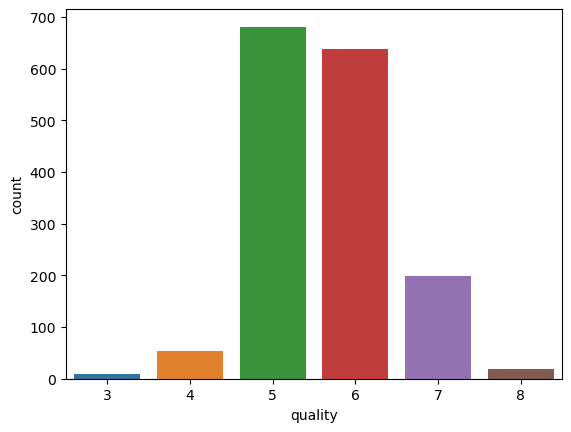

In [16]:
ax=sns.countplot(x='quality',data=df)
print(df['quality'].value_counts())

2    835
0    467
1    297
Name: Alcohol_content, dtype: int64


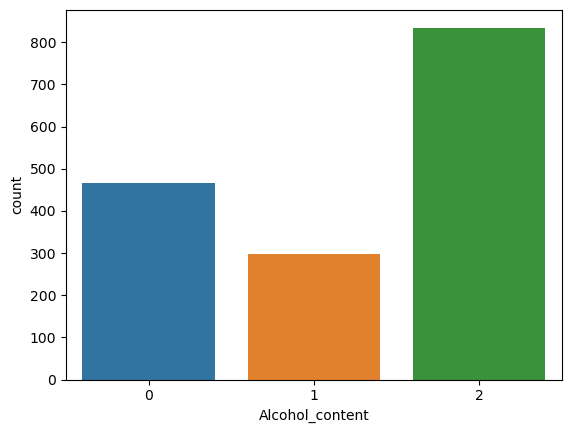

In [17]:
ax=sns.countplot(x='Alcohol_content',data=df)
print(df['Alcohol_content'].value_counts())

In [18]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Alcohol_content', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='Alcohol_content', ylabel='Density'>

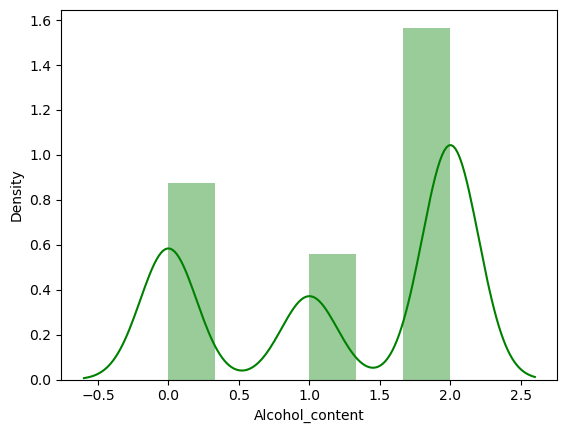

In [19]:
sns.distplot(df['Alcohol_content'],color='g')

This column is almost normally distributed

<AxesSubplot:xlabel='quality', ylabel='Density'>

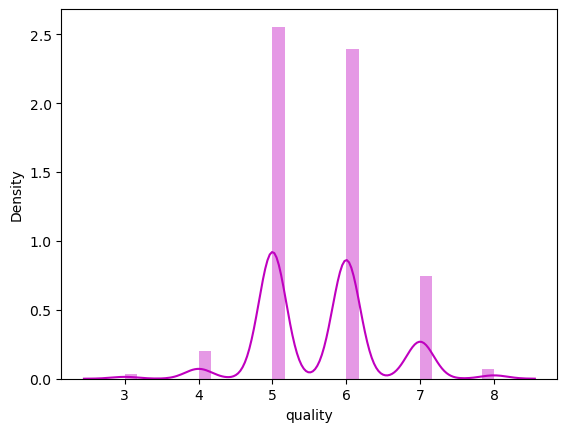

In [20]:
sns.distplot(df['quality'],color='m')

In [21]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Alcohol_content', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

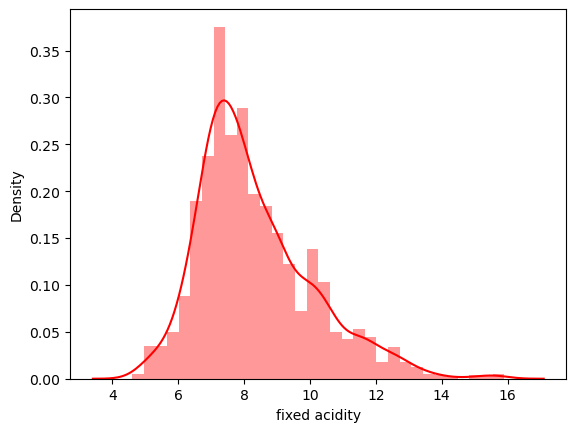

In [22]:
sns.distplot(df['fixed acidity'],color='r')

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

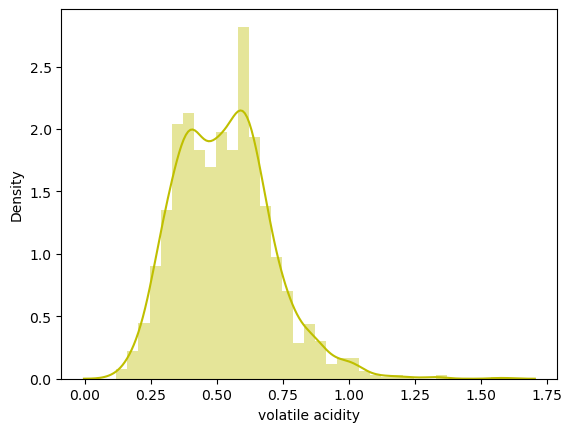

In [23]:
sns.distplot(df['volatile acidity'],color='y')

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

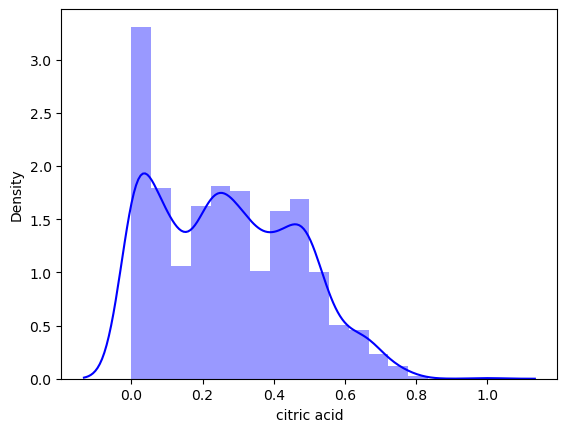

In [24]:
sns.distplot(df['citric acid'],color='b')

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

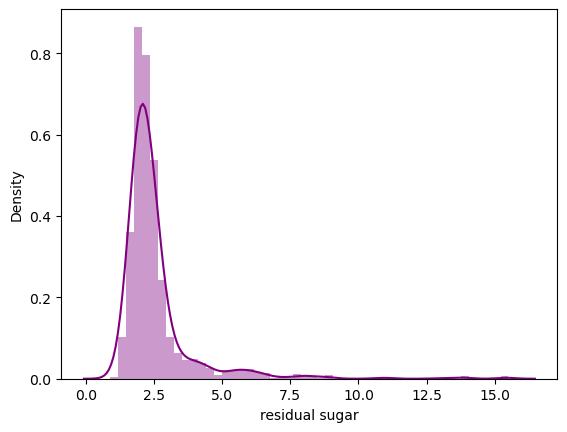

In [25]:
sns.distplot(df['residual sugar'],color='purple')

Here we can clearly see there is skewness present in this dataset.

In [26]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Alcohol_content', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

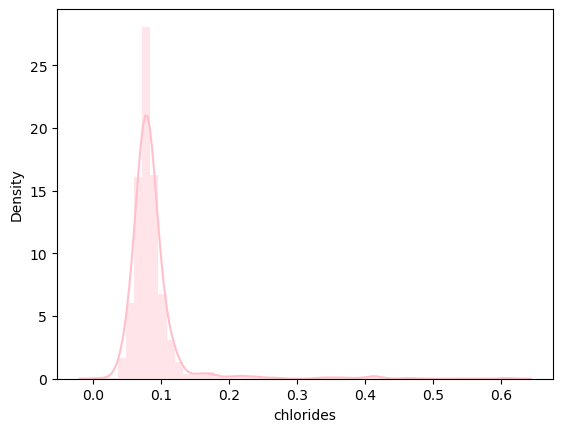

In [27]:
sns.distplot(df['chlorides'],color='pink')

Here also skewness is present

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

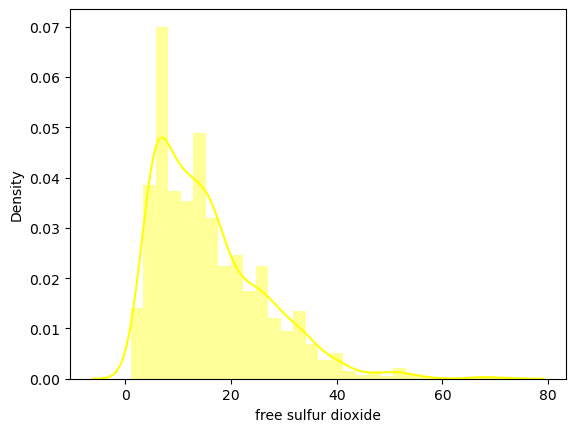

In [28]:
sns.distplot(df['free sulfur dioxide'],color='yellow')

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

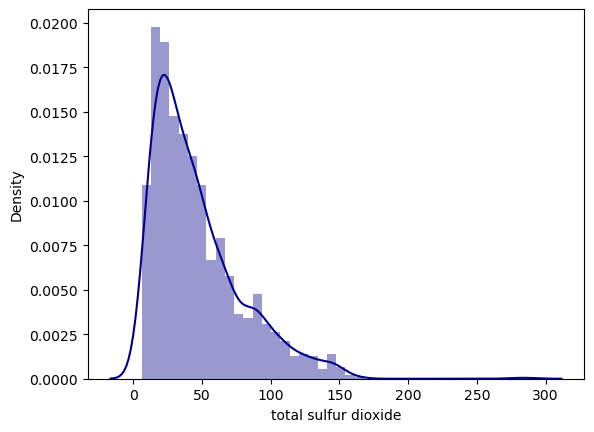

In [29]:
sns.distplot(df['total sulfur dioxide'],color='darkblue')

<AxesSubplot:xlabel='density', ylabel='Density'>

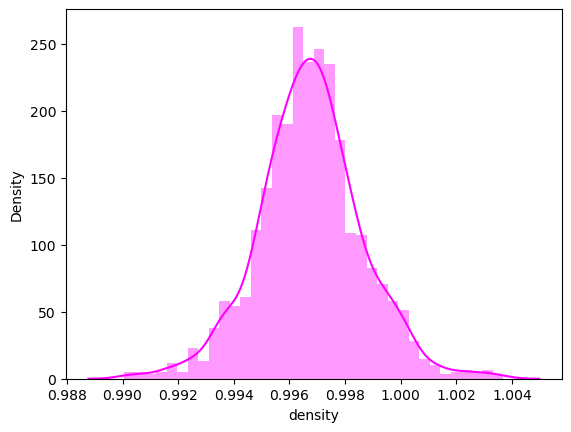

In [30]:
sns.distplot(df['density'],color='magenta')

<AxesSubplot:xlabel='pH', ylabel='Density'>

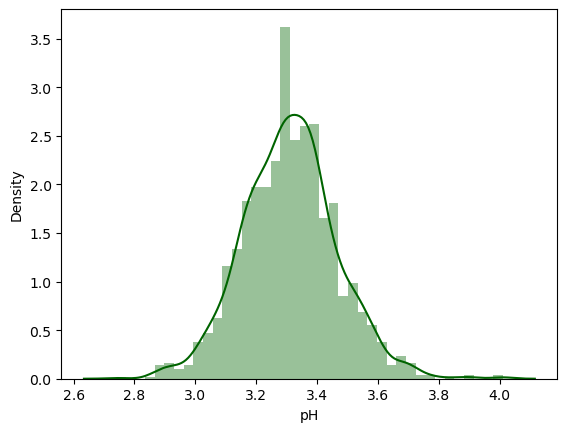

In [31]:
sns.distplot(df['pH'],color='darkgreen')

In [32]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Alcohol_content', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

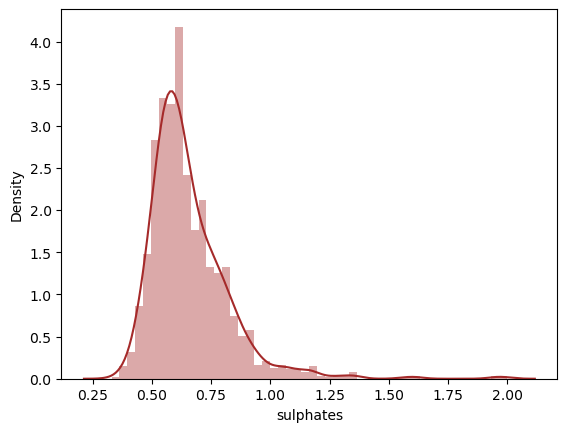

In [33]:
sns.distplot(df['sulphates'],color='brown')

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

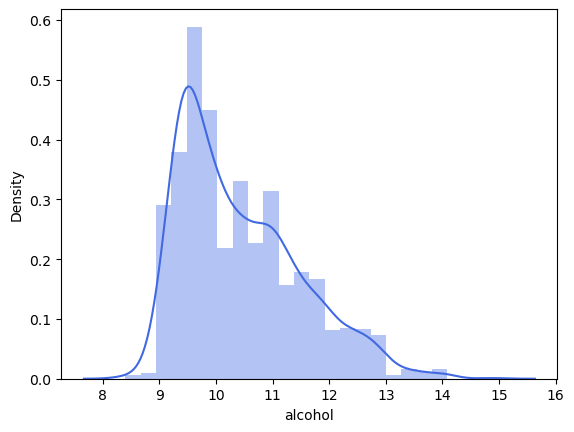

In [34]:
sns.distplot(df['alcohol'],color='royalblue')

Bi-variate Analysis

In [35]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Alcohol_content', 'quality'],
      dtype='object')

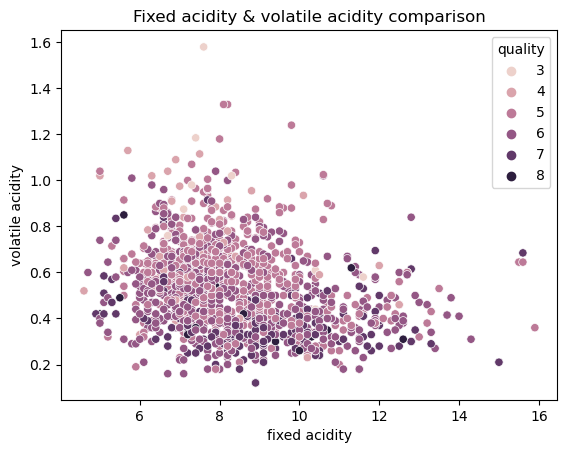

In [36]:
plt.title("Fixed acidity & volatile acidity comparison")
sns.scatterplot(x='fixed acidity',y='volatile acidity',hue='quality',data=df)
plt.show()

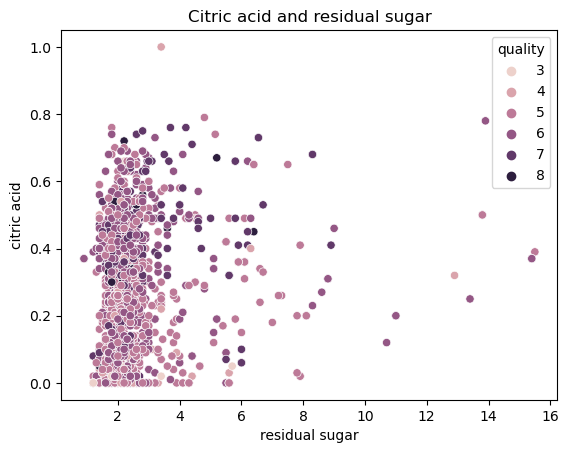

In [37]:
plt.title("Citric acid and residual sugar")
sns.scatterplot(y='citric acid',x='residual sugar',hue='quality',data=df)
plt.show()

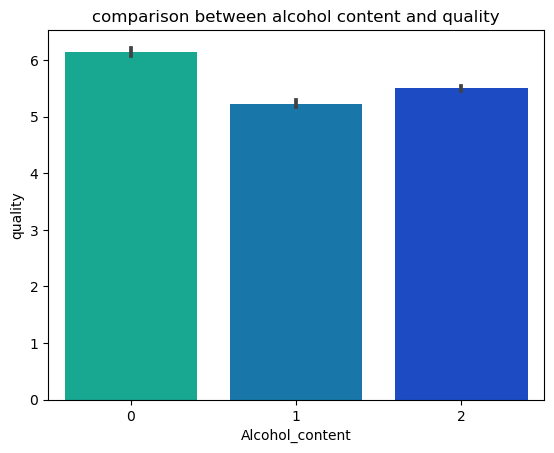

In [38]:
plt.title("comparison between alcohol content and quality")
sns.barplot(x='Alcohol_content',y='quality',data=df,palette='winter_r')
plt.show()

In [39]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Alcohol_content', 'quality'],
      dtype='object')

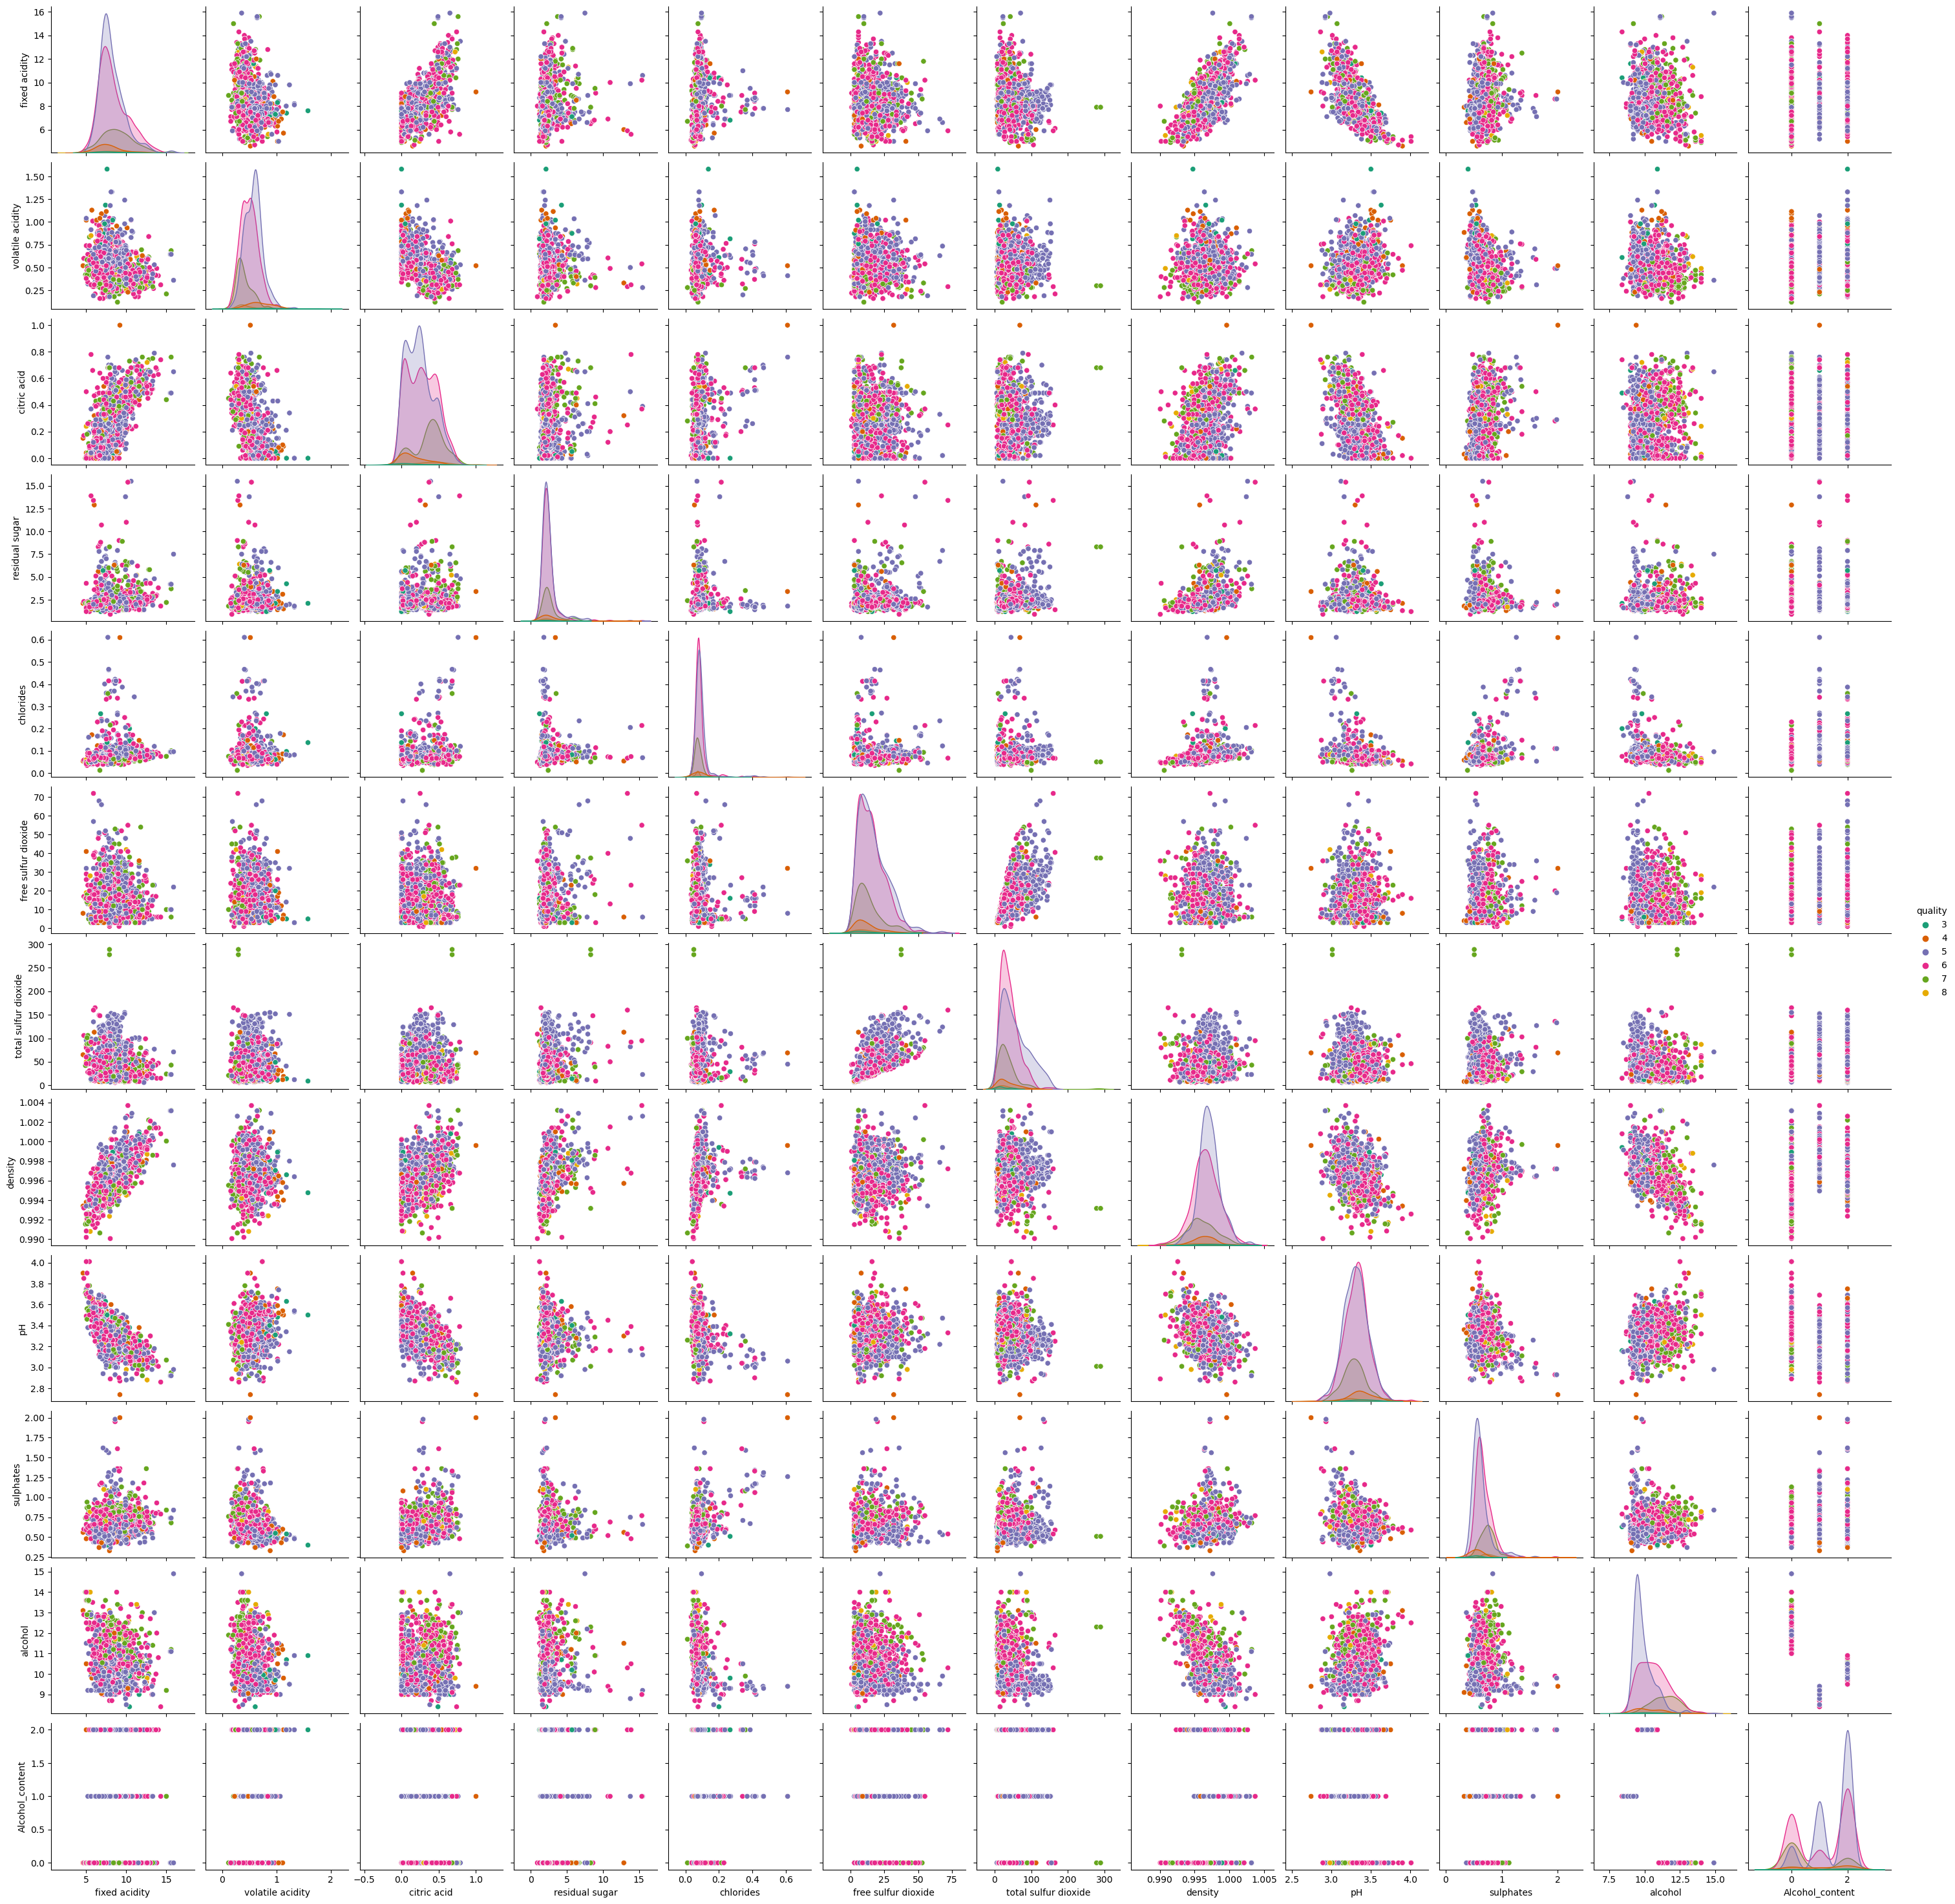

In [40]:
sns.pairplot(df,hue='quality',palette='Dark2')
plt.show()

# Detecting Outliers

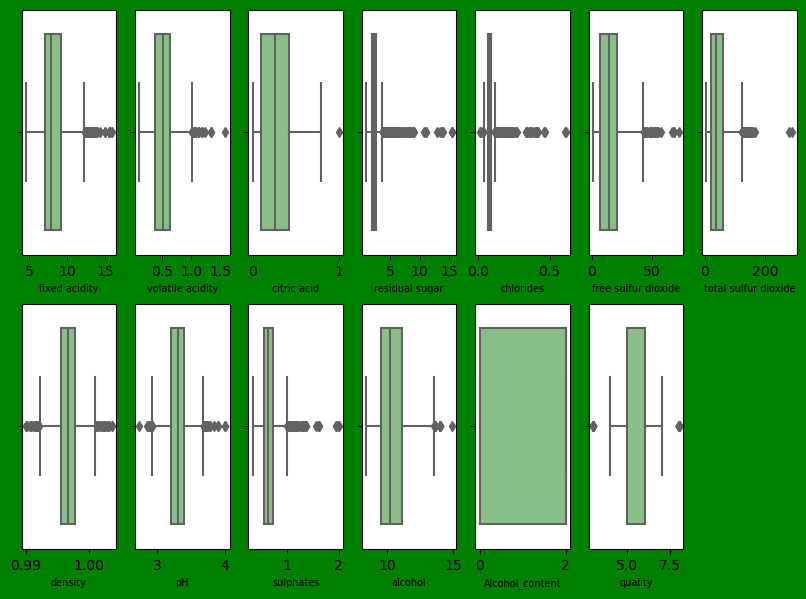

In [41]:
plt.figure(figsize=(10,7),facecolor='green')
plt.no=1
for col in df.columns:
    if plt.no<=13:
        ax=plt.subplot(2,7,plt.no)
        sns.boxplot(df[col],palette='Accent')
        plt.xlabel(col,fontsize=7)
    plt.no+=1
plt.show()

We can see this dataset is having ouliers, it must be removed before proceeding further

In [42]:
from scipy.stats import zscore

In [43]:
outliers=df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]

In [44]:
z=np.abs(zscore(outliers))
z

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.466193              0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261  0.719933   
2                0.083669              0.229047  0.134264  0.331177   
3                0.107592              0.411500  0.664277  0.979104   
4                0.466193              0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054              0.075043  0.978765  0.899886   
1595             2.211469              0.137820  0.862162  1.353436   
1596             1.255161              0.196679  0.533554  0.705508   
1597             1.542054              0.075043  0.676657  1.677400   
1598             0.203223              0.135861  0.666057  0.511130   

      sulphates   alcohol  
0      0.579207  0.960246  
1      0.128950  0.584777  
2      0.048089  0.584777  
3      0.461180  0.584777  
4      0.579207  0.960246  
...         ...       ...  
1594   0.461180  0.072294  
1595   0.601055  0.729364  
1596   0.542042  0.541630  
1597   0.305990  0.209308  
1598   0.010924  0.541630  

[1599 rows x 11 columns]

In [45]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [46]:
df_new=df[(z<3).all(axis=1)]
df_new

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  Alcohol_content  quality  
0         9.4                1        5  
1         9.8                2        5  
2         9.8                2        5  
3         9.8                2        6  
4         9.4                1        5  
...       ...              ...      ...  
1594     10.5                2        5  
1595     11.2                0        6  
1596     11.0                0        6  
1597     10.2                2        5  
1598     11.0                0        6  

[1458 rows x 13 columns]

In [47]:
print("Old Data Frame=",df.shape[0])
print("New Data Frame=",df_new.shape[0])

Old Data Frame= 1599
New Data Frame= 1458


In [48]:
print("Data Loss =",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Data Loss = 8.818011257035648


Here we can see data loss is only 8% which is acceptable. So we can now proceed further

In [49]:
df=df_new

# Skewness

In [50]:
df.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
Alcohol_content        -0.496879
quality                 0.248823
dtype: float64

Here as we know threshold for skewness is +/-0.5 which means there is skewness in the dataset.

Removing Skewness

In [51]:
df['residual sugar']=np.cbrt(df['residual sugar'])

In [52]:
df['chlorides']=np.cbrt(df['chlorides'])

In [53]:
df['total sulfur dioxide']=np.cbrt(df['total sulfur dioxide'])

In [54]:
df.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.629756
chlorides               1.056128
free sulfur dioxide     0.869727
total sulfur dioxide    0.343010
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
Alcohol_content        -0.496879
quality                 0.248823
dtype: float64

Now we can check the skewness has been removed.

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

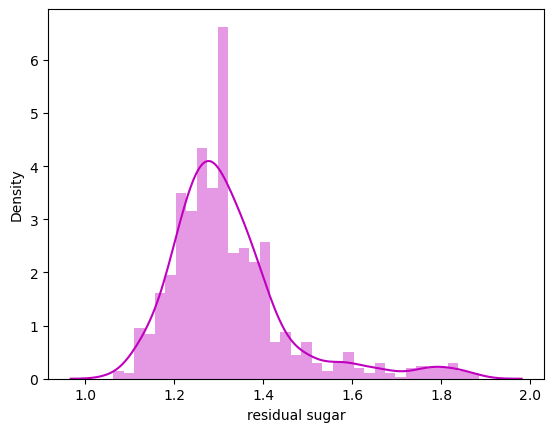

In [55]:
sns.distplot(df['residual sugar'],color='m')

As we can clearly see the data is now normally distributed

# Correlation

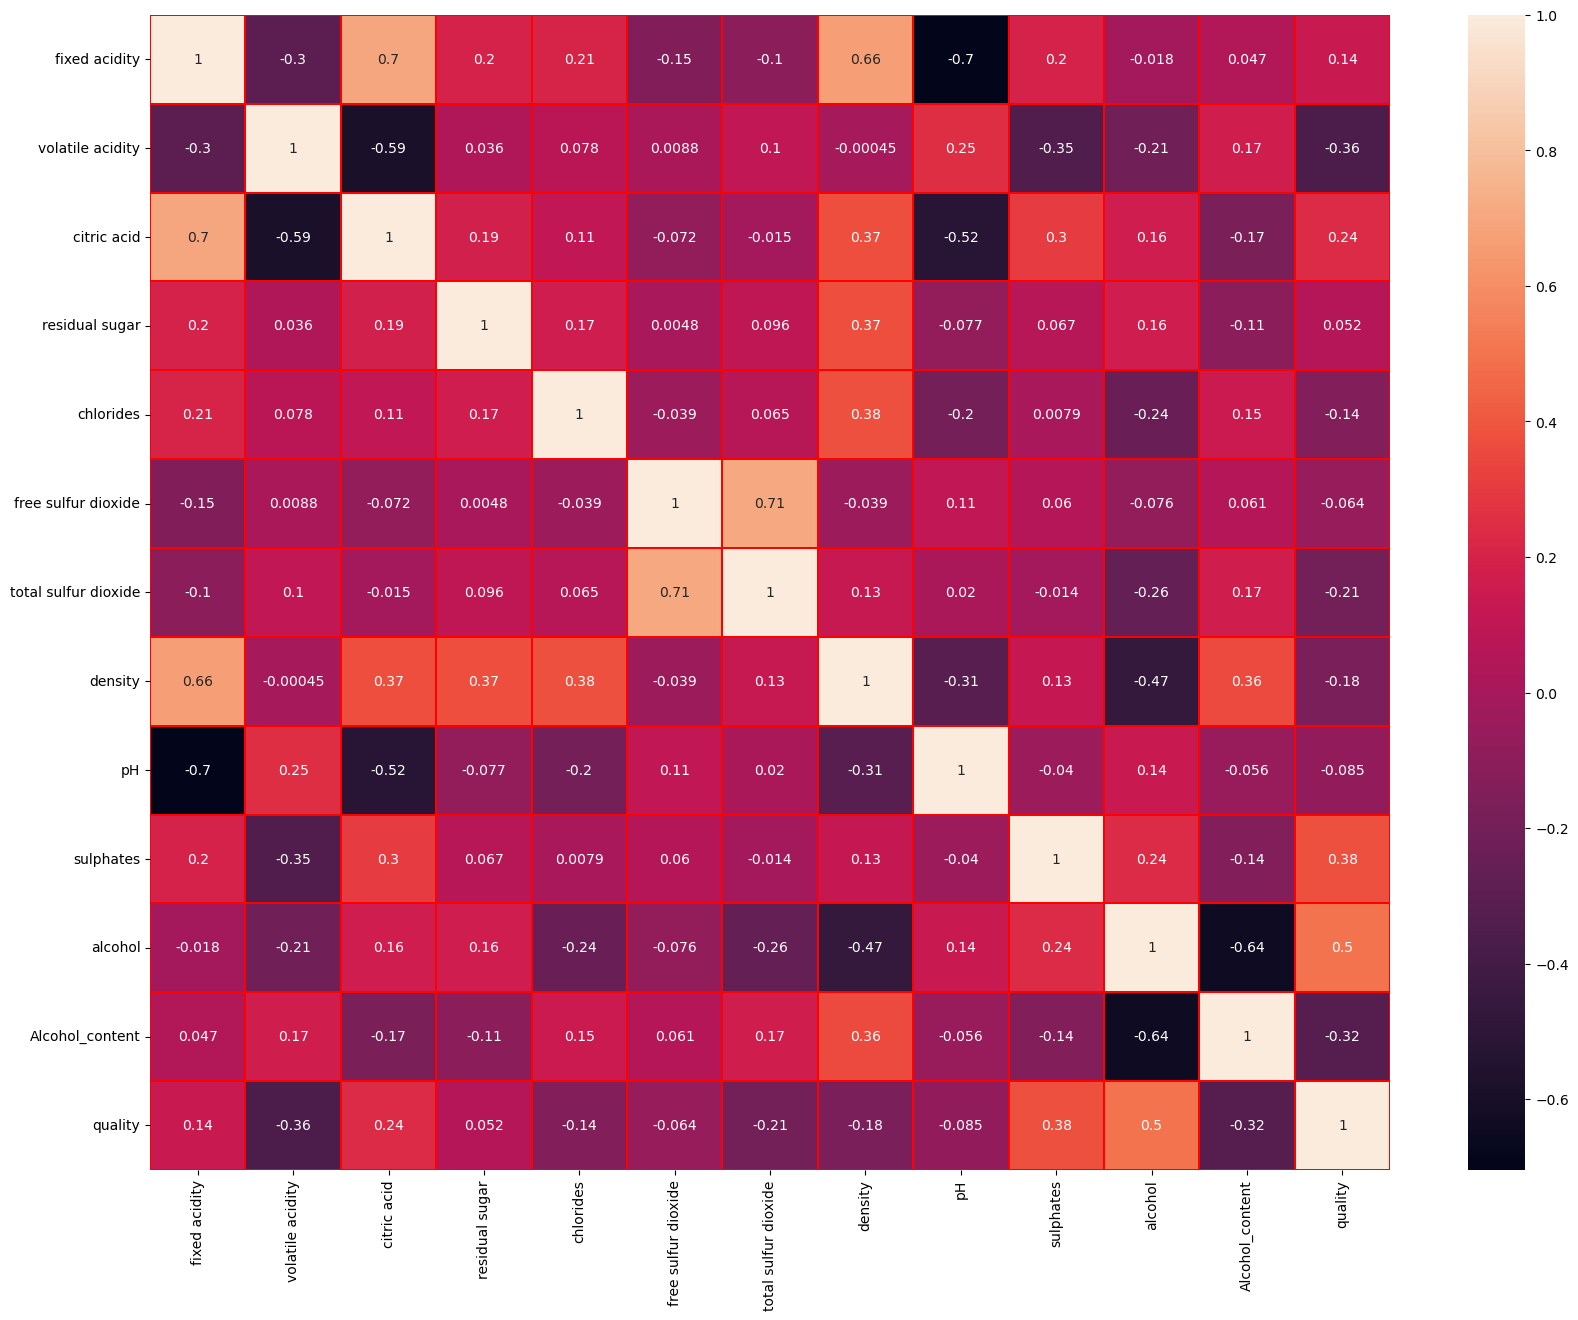

In [56]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidth=0.1,linecolor='red',annot=True)
plt.show()

In [57]:
cor=df.corr()

In [58]:
cor['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.497554
sulphates               0.379814
citric acid             0.238244
fixed acidity           0.135851
residual sugar          0.051887
free sulfur dioxide    -0.063786
pH                     -0.084922
chlorides              -0.139388
density                -0.177758
total sulfur dioxide   -0.205050
Alcohol_content        -0.322135
volatile acidity       -0.362783
Name: quality, dtype: float64

In [59]:
#Separating feature and target variable
x=df.iloc[:,0:-1]
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00        1.238562   0.423582   
1            7.8              0.88         0.00        1.375069   0.461044   
2            7.8              0.76         0.04        1.320006   0.451436   
3           11.2              0.28         0.56        1.238562   0.421716   
4            7.4              0.70         0.00        1.238562   0.423582   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0              3.239612   0.9978  3.51       0.56   
1                 25.0              4.061548   0.9968  3.20       0.68   
2                 15.0              3.779763   0.9970  3.26       0.65   
3                 17.0              3.914868   0.9980  3.16       0.58   
4                 11.0              3.239612   0.9978  3.51       0.56   

   alcohol  Alcohol_content  
0      9.4                1  
1      9.8                2  
2      9.8                2  
3      9.8                2  
4      9.4                1

In [60]:
y=df.iloc[:,-1]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [61]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [62]:
st=StandardScaler()
xf=st.fit_transform(x)

In [63]:
x=pd.DataFrame(data=xf,columns=x.columns)
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.554045          1.038708    -1.387413       -0.610269  -0.212751   
1      -0.311190          2.101325    -1.387413        0.388180   0.883719   
2      -0.311190          1.392914    -1.178214       -0.014565   0.602501   
3       1.753082         -1.440732     1.541370       -0.610269  -0.267369   
4      -0.554045          1.038708    -1.387413       -0.610269  -0.212751   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.439085             -0.151874  0.629873  1.374768  -0.635382   
1             1.063952              0.934243  0.047678 -0.823752   0.289771   
2            -0.009646              0.561889  0.164117 -0.398232   0.058483   
3             0.205073              0.740417  0.746312 -1.107432  -0.481190   
4            -0.439085             -0.151874  0.629873  1.374768  -0.635382   

    alcohol  Alcohol_content  
0 -0.996573        -0.279173  
1 -0.604915         0.860978  
2 -0.604915         0.860978  
3 -0.604915         0.860978  
4 -0.996573        -0.279173

In [64]:
#Checking VIF to rerduce multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

vif values              Features
0     8.053520         fixed acidity
1     1.855122      volatile acidity
2     3.214651           citric acid
3     1.775698        residual sugar
4     1.219406             chlorides
5     2.226268   free sulfur dioxide
6     2.494073  total sulfur dioxide
7     6.864570               density
8     3.215048                    pH
9     1.316849             sulphates
10    3.965050               alcohol
11    1.787192       Alcohol_content

VIF value within 10 is acceptable and we can conclude there is no multi-collinearity, so we can proceed further.

In [66]:
#Oversampling
y.value_counts()

5    617
6    586
7    185
4     47
8     16
3      7
Name: quality, dtype: int64

We can see this dataset is imbalanced, so we have to balance the dataset.

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [69]:
 y.value_counts()

5    617
6    617
7    617
4    617
8    617
3    617
Name: quality, dtype: int64

Now we can see the dataset is balanced.

In [70]:
#Finding the best random state
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [71]:
max_accu=0
max_RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_accu:
        max_accu=acc
        max_RS=i
print("Best Accuracy is",max_accu,"at random_state",max_RS)

Best Accuracy is 0.9000900090009001 at random_state 66


# Modelling

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=max_RS) 

In [73]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfcpred=rfc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,rfcpred))
print("Confusion Matrix\n",confusion_matrix(y_test,rfcpred))
print("Classification Report\n",classification_report(y_test,rfcpred))

Accuracy Score = 0.8973897389738974
Confusion Matrix
 [[172   1   0   0   0   0]
 [  0 195   2   1   0   0]
 [  1   5 158  30   1   0]
 [  1   2  36 118  18   5]
 [  0   0   0   9 168   2]
 [  0   0   0   0   0 186]]
Classification Report
               precision    recall  f1-score   support

           3       0.99      0.99      0.99       173
           4       0.96      0.98      0.97       198
           5       0.81      0.81      0.81       195
           6       0.75      0.66      0.70       180
           7       0.90      0.94      0.92       179
           8       0.96      1.00      0.98       186

    accuracy                           0.90      1111
   macro avg       0.89      0.90      0.89      1111
weighted avg       0.89      0.90      0.89      1111



In [76]:
sv=SVC()
sv.fit(x_train,y_train)
svpred=sv.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,svpred))
print("Confusion Matrix\n",confusion_matrix(y_test,svpred))
print("Classification Report\n",classification_report(y_test,svpred))

Accuracy Score = 0.7875787578757876
Confusion Matrix
 [[173   0   0   0   0   0]
 [  4 175  14   3   2   0]
 [  8  17 130  34   5   1]
 [  3   5  54  80  29   9]
 [  0   0   9  23 131  16]
 [  0   0   0   0   0 186]]
Classification Report
               precision    recall  f1-score   support

           3       0.92      1.00      0.96       173
           4       0.89      0.88      0.89       198
           5       0.63      0.67      0.65       195
           6       0.57      0.44      0.50       180
           7       0.78      0.73      0.76       179
           8       0.88      1.00      0.93       186

    accuracy                           0.79      1111
   macro avg       0.78      0.79      0.78      1111
weighted avg       0.78      0.79      0.78      1111



In [77]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtcpred=dtc.predict(x_test)
print("Accuracy Score=",accuracy_score(y_test,dtcpred))
print("Confusion Matrix\n",confusion_matrix(y_test,dtcpred))
print("Classification Report\n",classification_report(y_test,dtcpred))

Accuracy Score= 0.7956795679567957
Confusion Matrix
 [[168   2   2   1   0   0]
 [  4 169  18   6   0   1]
 [  1  21 120  48   5   0]
 [  2  12  37 102  22   5]
 [  2   2   4  17 146   8]
 [  2   0   0   2   3 179]]
Classification Report
               precision    recall  f1-score   support

           3       0.94      0.97      0.95       173
           4       0.82      0.85      0.84       198
           5       0.66      0.62      0.64       195
           6       0.58      0.57      0.57       180
           7       0.83      0.82      0.82       179
           8       0.93      0.96      0.94       186

    accuracy                           0.80      1111
   macro avg       0.79      0.80      0.79      1111
weighted avg       0.79      0.80      0.79      1111



In [78]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knnpred=knn.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,knnpred))
print("Confusion Matrix\n",confusion_matrix(y_test,knnpred))
print("Classification Report\n",classification_report(y_test,knnpred))

Accuracy Score = 0.7893789378937894
Confusion Matrix
 [[173   0   0   0   0   0]
 [  4 190   1   2   1   0]
 [ 13  27  96  48  10   1]
 [  8  23  30  68  39  12]
 [  0   1   1   8 166   3]
 [  0   0   0   0   2 184]]
Classification Report
               precision    recall  f1-score   support

           3       0.87      1.00      0.93       173
           4       0.79      0.96      0.87       198
           5       0.75      0.49      0.59       195
           6       0.54      0.38      0.44       180
           7       0.76      0.93      0.84       179
           8       0.92      0.99      0.95       186

    accuracy                           0.79      1111
   macro avg       0.77      0.79      0.77      1111
weighted avg       0.77      0.79      0.77      1111



In [79]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abcpred=abc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,abcpred))
print("Confusion Matrix\n",confusion_matrix(y_test,abcpred))
print("Classification Report\n",classification_report(y_test,abcpred))

Accuracy Score = 0.29972997299729975
Confusion Matrix
 [[172   0   0   0   1   0]
 [158   0   0   4  36   0]
 [165   0   0  13  15   2]
 [ 93   0   0  25  38  24]
 [ 27   0   0  25  57  70]
 [  0   0   0  16  91  79]]
Classification Report
               precision    recall  f1-score   support

           3       0.28      0.99      0.44       173
           4       0.00      0.00      0.00       198
           5       0.00      0.00      0.00       195
           6       0.30      0.14      0.19       180
           7       0.24      0.32      0.27       179
           8       0.45      0.42      0.44       186

    accuracy                           0.30      1111
   macro avg       0.21      0.31      0.22      1111
weighted avg       0.21      0.30      0.22      1111



In [80]:
#Cross Validation
from sklearn.model_selection import cross_val_score

In [81]:
score=cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print("Difference between accuracy and CV score is:",accuracy_score(y_test,rfcpred)-score.mean())

[0.8245614  0.80431849 0.84054054 0.84189189 0.85675676]
0.8336138162453952
Difference between accuracy and CV score is: 0.06377592272850219


In [82]:
score=cross_val_score(sv,x,y)
print(score)
print(score.mean())
print("Difference between accuracy and CV score is:",accuracy_score(y_test,svpred)-score.mean())

[0.77462888 0.74224022 0.75810811 0.76081081 0.77297297]
0.7617521975416712
Difference between accuracy and CV score is: 0.025826560334116344


In [83]:
score=cross_val_score(dtc,x,y)
print(score)
print(score.mean())
print("Difference between accuracy and CV score is:",accuracy_score(y_test,dtcpred)-score.mean())

[0.73549258 0.74763833 0.74594595 0.74054054 0.7527027 ]
0.7444640186745449
Difference between accuracy and CV score is: 0.051215549282250805


In [84]:
score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("Difference between accuracy and CV score is:",accuracy_score(y_test,knnpred)-score.mean())

[0.74358974 0.74763833 0.78243243 0.75540541 0.76621622]
0.7590564248458984
Difference between accuracy and CV score is: 0.03032251304789102


# Hyper Parameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
parameters={'n_neighbors':[5,10,12,16,13,15],'weights':['uniform','distance'],'leaf_size':[30,40,50,60,70]}
grid=GridSearchCV(estimator=knn,param_grid=parameters)
grid.fit(x,y)
print("Score :",grid.best_score_)
print(grid.best_params_)

Score : 0.777691213480687
{'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}


In [87]:
knn=KNeighborsClassifier(leaf_size=30,n_neighbors=5,weights='distance')
knn.fit(x_train,y_train)
knnpred=knn.predict(x_test)
print("Accuracy Score :",accuracy_score(y_test,knnpred))

Accuracy Score : 0.8532853285328533


In [88]:
parameters={'n_estimators':[50,60,70,100,120],"criterion":['gini','entropy','log_loss']}
grid=GridSearchCV(estimator=rfc,param_grid=parameters)
grid.fit(x,y)
print("SCORE :",grid.best_score_)
print(grid.best_params_)

SCORE : 0.8273986942407994
{'criterion': 'gini', 'n_estimators': 60}


In [91]:
rfc=RandomForestClassifier(criterion='gini',n_estimators=60)
rfc.fit(x_train,y_train)
rfcpred=rfc.predict(x_test)
print("Accuracy Score :",accuracy_score(y_test,rfcpred))

Accuracy Score : 0.8928892889288929


In [92]:
Final_model=rfc
Final_model

RandomForestClassifier(n_estimators=60)

# Saving the best model

In [93]:
import joblib

In [95]:
joblib.dump(Final_model,"Red Wine Quality.pkl")

['Red Wine Quality.pkl']

In [98]:
model=joblib.load("Red Wine Quality.pkl")
prediction=model.predict(x_test)

In [99]:
actual=np.array(y_test)
ds=pd.DataFrame({"Actual Value":actual,"Predicted Value":prediction})
ds

Actual Value  Predicted Value
0                7                6
1                3                3
2                7                7
3                6                6
4                3                3
...            ...              ...
1106             5                6
1107             8                8
1108             4                4
1109             5                6
1110             5                5

[1111 rows x 2 columns]